# 1. Define the Problem and Get the Data, Explore (Data Report)

# 1.1 Current Situation

There are many factors that infulence the price of the house & not just the few obvious ones like number of bedrooms & total area. Some of these attributes can be locality, house facing, lot area, garage area & so on.
Taking into account all such  factors while predicting the price is too cumbersonme for an individual like house seller or real estate agents. This causes a significant features of a house being unaccounted for while predicting  the house price  & price being set either too high or too low.     

# 1.2 Opportunity for improvement

There is opporunity to build a machine learning model which will predict the price of a house based on past data for other properties. A ML based price predictor will help as a ready reference for estate agents,property consultants and even indiduals to predict the optimum price of the house.
This model will help housebuyer to understand which features ( no of bedrooms,locality etc.) influence price of the house. It will help them to know if the quoted price of the house is a fair deal or not & make an informed decision.
It will also unlock any hidden features that might be influnecing the price of the property which might go unnoticed by an individual.Similarly it will help house seller to quote an optimum price quote for his house which is in line with the market trend.

# 1.3 Data Requirement 

Data is collected on sales of properties similar to the houses for which prices need to be predicted. It is important that the data collected reflect the recent past and also includes detailing on all the attributes to ensure the final prices represents the true market value.
Since comparable sales are not identical to the house property, the main idea is to simulate the price that would have been paid if each comparable sale were identical to the house property. Hence it becomes rather important to draw inferences from each attribute under consideration, and derive its contribution to the final price outcome.



# 1.4 Source of data and challenges

We have a dataset of properties and their prices. Source is a structured CSV. Some of the features may not have been represented correctly in the dataset.
Therefore feature prerocessing becomes the most important step that needs to be performed before building the final model. The quality of the model largely depends on the data that is fed into the model. 

When data is collected from data mining processes, some of the important data might be missing or might be highly susceptible to contain noise. Feature preprocessing turns raw data into a one that is usable by a machine learning model.

# 1.5 Dataset Size 

The size of the dataset required depends upon the problem being solved. For establishing the house prices, we need a minimum dataset of 10000 rows with enough representation from  all features. Its generally observed that simple models on large data sets generally perform better than complex models built on small data sets.

The current dataset has 21613 rows with 22 different features detailing the house. The volume of records will help us develop a model that will accurately predict the housing prices. However quality of this data directly impacts the model output, like Feature Representation, presence of outliers etc. 

Hence, EDA and Feature Engineering becomes very critical step towards building a reliable model.

# EDA & Data Pre-processing

#### Importing required libraries

In [1]:
# Importing library to perform numerical operations
import numpy as np   

# Importing library to load data and perform data checks and validations
import pandas as pd

# Importing ploting libraries
import matplotlib.pyplot as plt   
import seaborn as sns

# Importing machine learning regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Importing library to split data into testing and training set
from sklearn.model_selection import train_test_split
 
# Importing libraries for computing scores and performing statistical operations
from scipy import stats
from scipy.stats import norm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

In [2]:
# reading the CSV file into pandas dataframe
# house_df = pd.read_csv("drive/My Drive/innercity.csv")  
house_df = pd.read_csv('C:/Users/Ramesh/Desktop/Karthik/Python Programming/GL_Capstone/innercity.csv')

In [3]:
# Check the number of rows and columns
rows, columns = house_df.shape
print("No of rows: ", rows) 
print("No of columns: ", columns) 

No of rows:  21613
No of columns:  23


# 5 Point Summary for numerical attributes

In [4]:
house_df.describe().transpose()

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
room_bath         21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
living_measure    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
lot_measure       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
ceil              21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
coast             21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
sight             21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition         21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
quality           21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
ceil_measure      21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
basement          21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built          21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
living_measure15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
lot_measure15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   
furnished         21613.0  1.966872e-01  3.975030e-01  0.000000e+00   
total_area        21613.0  1.718687e+04  4.158908e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.035000e+03  9.575000e+03  1.300000e+04  1.652659e+06

In [5]:
house_df.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight     ...      basement  yr_built  \
0        13457   1.0      0      0     ...             0      1956   
1         7500   1.0      0      0     ...           800      1976   
2         4324   2.0      0      0     ...             0      2006   
3         3844   1.0      0      0     ...             0      1916   
4         4050   1.0      0      0     ...             0      1954   

   yr_renovated  zipcode      lat     long  living_measure15  lot_measure15  \
0             0    98133  47.7174 -122.336              2120           7553   
1             0    98023  47.3165 -122.386              2260           8800   
2             0    98038  47.3515 -121.999              2370           4348   
3             0    98133  47.7049 -122.349              1520           3844   
4             0    98115  47.6768 -122.269              1900           5940   

   furnished  total_area  
0          1       16477  
1          0       10050  
2          0        6694  
3          0        4664  
4          0        5450  

[5 rows x 23 columns]

In [6]:
#Check Data types
house_df.dtypes

cid                   int64
dayhours             object
price                 int64
room_bed              int64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
dtype: object

dayhours is of object type , which we would transform in the Feature Engineering section

In [7]:
# Check for missing values present
print('Number of missing values across columns-\n', house_df.isnull().sum())

Number of missing values across columns-
 cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64


# Feature Engineering

In [8]:
# Dropping the cid column as it is a useless feature and doesn't add any value in price prediction 
house_df =house_df.drop(labels= "cid" , axis = 1)

In [9]:
#Transforming timestamp column
house_df['dayhours'] = house_df['dayhours'].str[:8]

In [10]:
#Extracting year details from the timestamp column
house_df['Date'] = house_df['dayhours'].astype('datetime64[ns]')
house_df['sold_in_yr'] = pd.DatetimeIndex(house_df['Date']).year
#house_df['sold_in_month'] = pd.DatetimeIndex(house_df['Date']).month

#drop temporary Date Column 
house_df =house_df.drop(labels= "Date" , axis = 1)

#drop dayhours column
house_df =house_df.drop(labels= "dayhours" , axis = 1)

In [11]:
# We create a new column house age by subtracting year sold & year built. This is because age of the house is critical feature impacting price
house_df['house_age'] = house_df['sold_in_yr'] - house_df['yr_built'].astype(int)

In [12]:
# Create a new column to mark if house is renovated or not 
house_df['is_renovated'] = np.where(house_df.yr_renovated == 0,0,1)

#drop yr_renovated as data is alreeady considered in is_renovated
house_df =house_df.drop(labels= "yr_renovated" , axis = 1)

In [13]:
house_df.head(25)

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0   808100         4       3.25            3020        13457   1.0      0   
1   277500         4       2.50            2550         7500   1.0      0   
2   404000         3       2.50            2370         4324   2.0      0   
3   300000         2       1.00             820         3844   1.0      0   
4   699000         2       1.50            1400         4050   1.0      0   
5   585000         3       2.50            2050        11690   2.0      0   
6   465000         3       1.75            1480         6360   1.0      0   
7   480000         3       1.50            2100        67269   1.0      0   
8   780000         4       2.00            2600         4800   1.0      0   
9   215000         4       1.00            1130         7400   1.0      0   
10  402000         2       1.00             710         5100   1.0      0   
11  299000         4       2.50            2350         6958   2.0      0   
12  785000         4       2.50            3440        56192   2.0      0   
13  865000         4       2.00            2750         5527   2.0      0   
14  554000         5       2.50            3440        12900   1.0      0   
15  361000         3       1.50            1200         7236   1.0      0   
16  459000         4       2.75            2790         6600   2.0      0   
17  200000         3       1.00            1480         5600   1.0      0   
18  403000         2       1.00            1100         3598   1.0      0   
19  327500         3       2.25            2310         7200   2.0      0   
20  700000         5       2.75            3100         9825   2.0      0   
21  730000         3       2.50            2160         8809   1.0      0   
22  207000         2       1.50            1068         1158   2.0      0   
23  750000         3       1.00            1120         8549   1.0      0   
24  595000         2       2.00            1510         4000   1.0      0   

    sight  condition  quality      ...       zipcode      lat     long  \
0       0          5        9      ...         98133  47.7174 -122.336   
1       0          3        8      ...         98023  47.3165 -122.386   
2       0          3        8      ...         98038  47.3515 -121.999   
3       0          4        6      ...         98133  47.7049 -122.349   
4       0          4        8      ...         98115  47.6768 -122.269   
5       0          4        9      ...         98059  47.5279 -122.161   
6       0          3        7      ...         98133  47.7311 -122.353   
7       0          4        7      ...         98028  47.7592 -122.230   
8       2          3        8      ...         98119  47.6370 -122.371   
9       0          4        7      ...         98003  47.3437 -122.316   
10      0          5        7      ...         98117  47.6765 -122.381   
11      0          3        9      ...         98092  47.3321 -122.172   
12      0          3        9      ...         98053  47.6969 -122.046   
13      0          3        8      ...         98119  47.6513 -122.368   
14      2          4        8      ...         98166  47.4426 -122.342   
15      0          3        7      ...         98011  47.7390 -122.194   
16      0          3        9      ...         98058  47.4362 -122.109   
17      0          4        6      ...         98178  47.5045 -122.270   
18      0          4        7      ...         98144  47.5738 -122.313   
19      0          3        8      ...         98031  47.4051 -122.193   
20      2          4        8      ...         98125  47.7188 -122.281   
21      0          3        9      ...         98103  47.6994 -122.349   
22      0          3        7      ...         98028  47.7530 -122.244   
23      0          3        7      ...         98004  47.6294 -122.205   
24      0          4        7      ...         98103  47.6582 -122.345   

    living_measure15  lot_measure15  furnished  total_area  sold_in_yr  \
0  

**TEMPORAL Features**

Time series data has a temporal value attached to it, so this would be something like a date or a time stamp that we can used to look for trends over a period of time.

In [14]:
# List of variables that contain year information
year_feature = [feature for feature in house_df if 'yr' in feature]

year_feature

['yr_built', 'sold_in_yr']

In [15]:
# Displaying the content of year variables
for feature in year_feature:
    print(feature, house_df[feature].unique())

yr_built [1956 1976 2006 1916 1954 1989 1949 1953 1969 1905 1998 1994 1901 1958
 1975 2000 1947 1926 1990 1950 2014 1952 1900 1986 1928 1967 1978 2004
 2002 1944 1942 1981 2009 1966 1999 2010 1951 1993 1924 1939 1960 1979
 1983 1920 1977 1955 1984 2003 1980 1959 1992 1974 2005 1936 1961 2007
 1946 1957 1913 1970 1948 1997 1962 1922 1941 1937 1906 1914 1971 1918
 1930 1982 1940 1915 1972 2001 1985 1973 2008 1927 1945 2015 1987 2011
 1943 1968 1963 1931 1964 1988 1965 1902 1996 2013 1925 1919 1907 1903
 1995 1910 1938 1929 1917 1933 1991 1921 1908 1904 1909 1912 1935 2012
 1911 1934 1923 1932]
sold_in_yr [2014 2015]


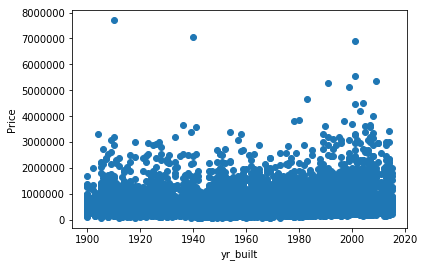

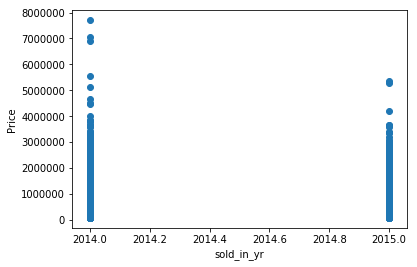

In [16]:
# Comparing all time variables with the target Price variable
for feature in year_feature:
        data_yr=house_df.copy()
        plt.scatter(data_yr[feature],data_yr['price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.show()

In [17]:
# Different values for column sold_in_yr
house_df.sold_in_yr.value_counts()

2014    14633
2015     6980
Name: sold_in_yr, dtype: int64

#### Inferences on Temporal Features

yr_built :
The year during which the house was built do not have any impact on the final price as depicted by the visualization above.

yr_renovated :
Most of the values for attribute yr_renovated are zero (approx 95%). This is a weak contributor towards the prediction of the house price.

sold_in_year :
The dataset includes all houses that were sold during years 2014 and 2015. Hence the predicted price of the house is only relevant to this specific timeframe, ie it indicates the price predicted for a house in 2014-15.



# Pair Plot

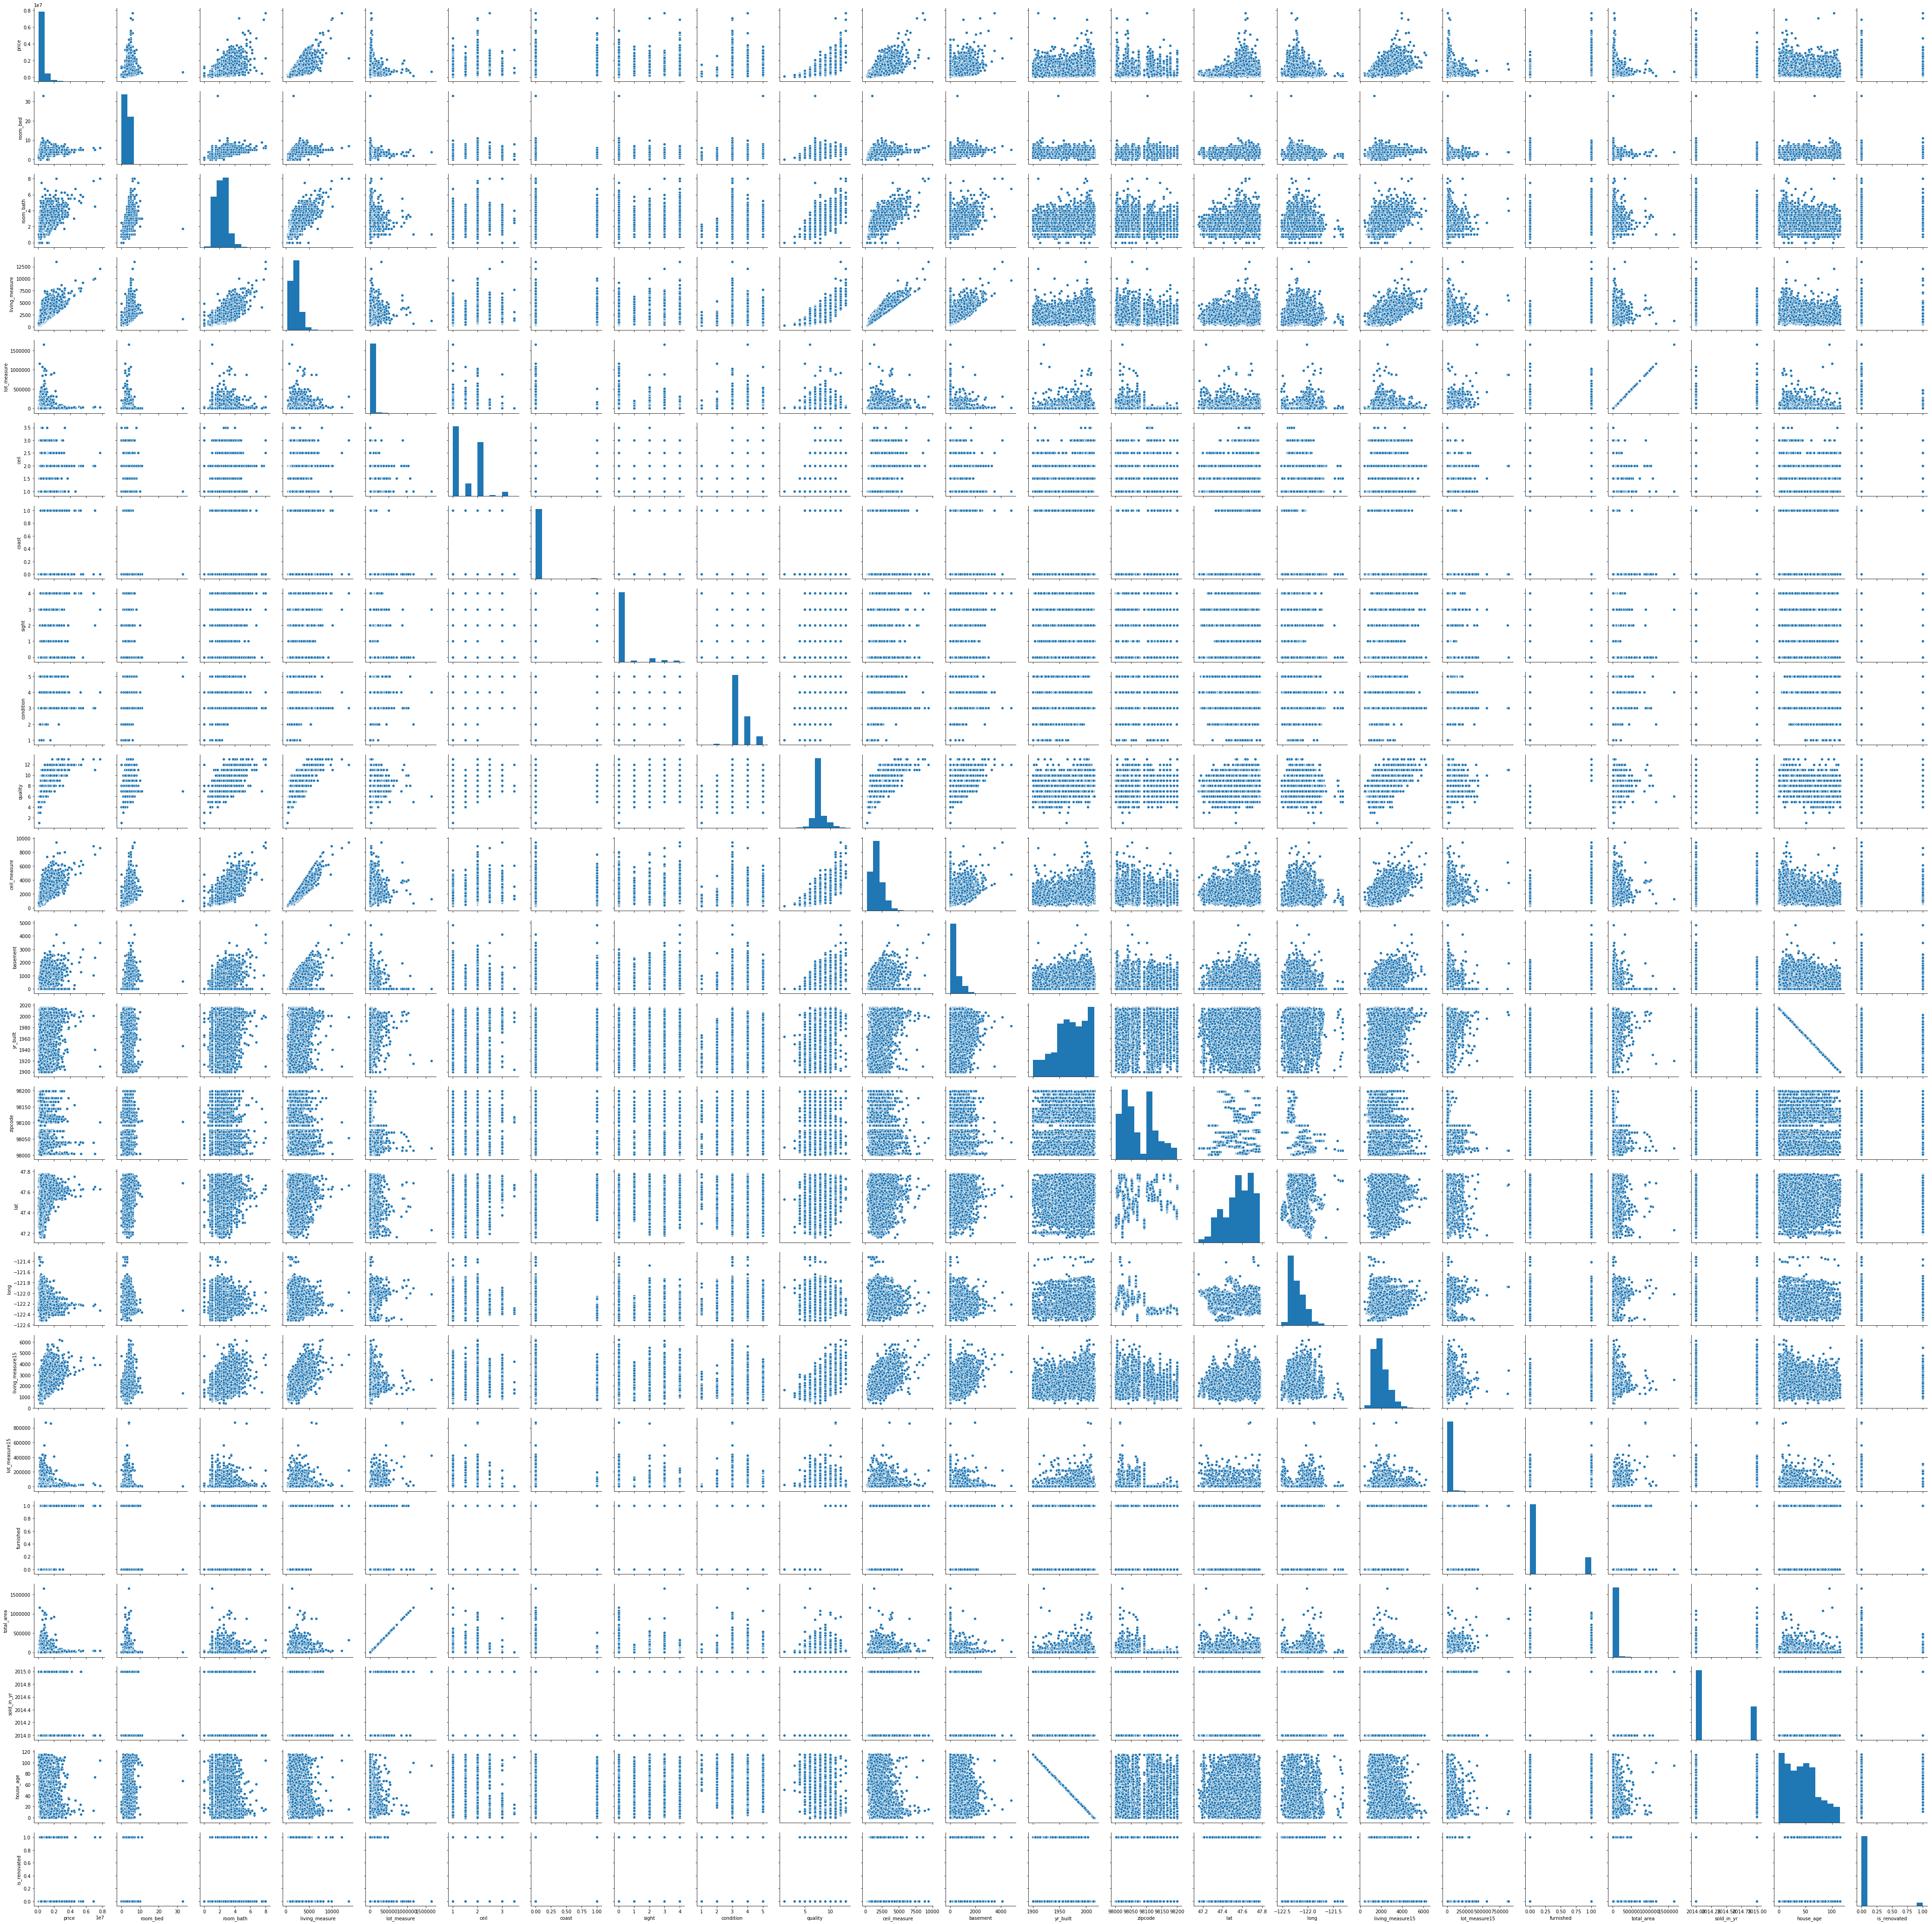

In [18]:
# Create the  pairplot
sns.pairplot(house_df)

#### Discrete Feature Analysis

Discrete Variables are integral in nature which indicates distinct numerical values. Such attributes can only contain finite number of values.

For our analyses, we consider threshhold of 30 distinct values for any attribute to be classified as DISCRETE.

In [19]:
discrete_feature=[feature for feature in house_df if len(house_df[feature].unique())<30 and feature not in year_feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 8


In [20]:
discrete_feature

['room_bed',
 'ceil',
 'coast',
 'sight',
 'condition',
 'quality',
 'furnished',
 'is_renovated']

In [21]:
house_df[discrete_feature].head()

room_bed  ceil  coast  sight  condition  quality  furnished  is_renovated
0         4   1.0      0      0          5        9          1             0
1         4   1.0      0      0          3        8          0             0
2         3   2.0      0      0          3        8          0             0
3         2   1.0      0      0          4        6          0             0
4         2   1.0      0      0          4        8          0             0

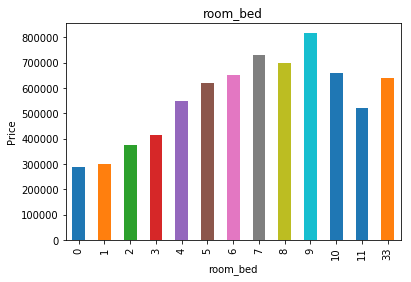

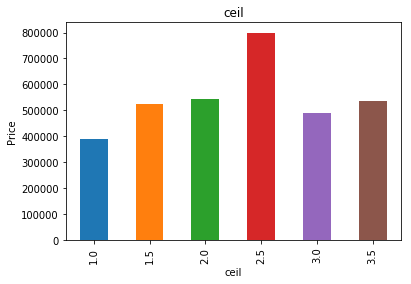

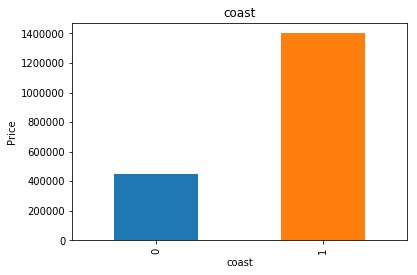

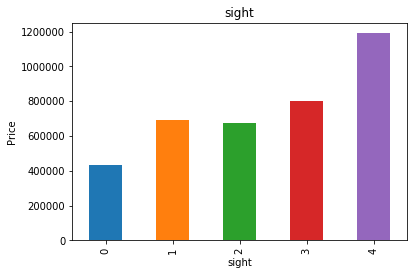

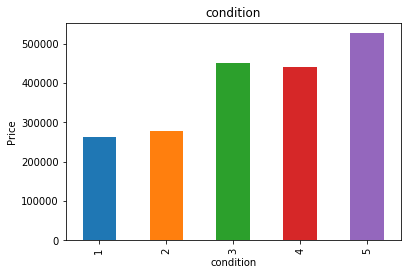

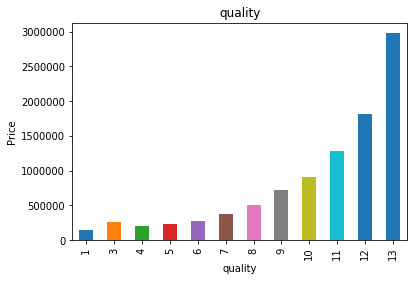

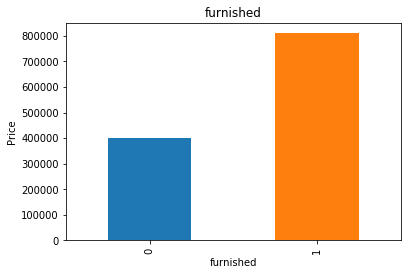

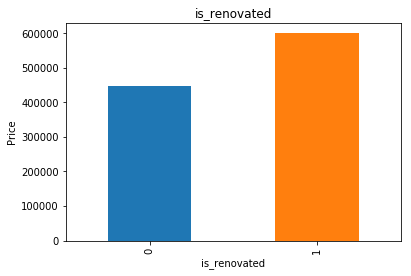

In [22]:
# Comparing all the discrete variables with the target Price variable
for feature in discrete_feature:
    data_disc=house_df.copy()
    data_disc.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

#### Inferences on Discrete Features

room_bed :
Houses with 2 bedrooms or less tends to be priced the lowest. Also the dataset contains mostly the houses with more than 2 bedrooms (approx 86%).

ceil :
Total floors in the house do not strongly contribute to the final price of the house. In the given dataset the median price is highest for house with 2.5 floors, however this sample only constitues an insignificant percentage of the total sample.

coast :
House which has a view to a waterfront is sold at a significantly higher price compared to a house with no coast.

sight :
House which has been viewed more tends to fetch more price compared to houses which has been less seen by the prospective customers.

condition : 
Houses with overall good condition 5 tends to be priced higher. However the prices are not very sensitive between condition ratings 1/2 or 3/4. The percentage of houses rated with condition 5 is significantly very low.

quality :
Quality indicates grade given to the housing unit, based on grading system. This attribute is directly correlated to the price of the house. Higher the quality grade of the house, higher the price it tends to fetch.

furnished :
This variable is based on the quality of room. Quality grades 9 and higher have the value 1, whereas the grades less than 9 have the value 0.
As depiceted above, houses with furnished value 1 (higher quality grades) tends to fetch higher prices. 

is_renovated:
House which are renovated tends to fetch more price compared to houses which are not renovated.

#### CONTINUOUS Features Analysis

Continuous Features has an infinite number of possible values.

In [23]:
continuous_feature=[feature for feature in house_df if feature not in discrete_feature+year_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 13


In [24]:
continuous_feature

['price',
 'room_bath',
 'living_measure',
 'lot_measure',
 'ceil_measure',
 'basement',
 'zipcode',
 'lat',
 'long',
 'living_measure15',
 'lot_measure15',
 'total_area',
 'house_age']

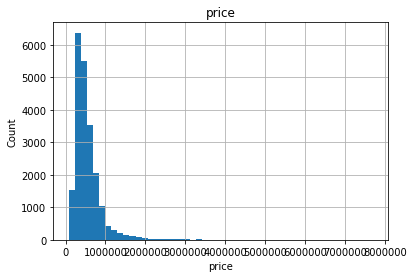

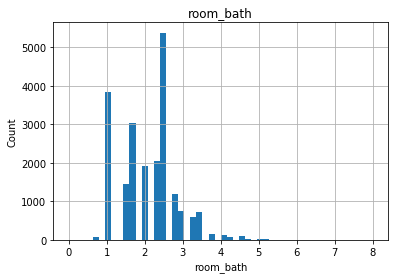

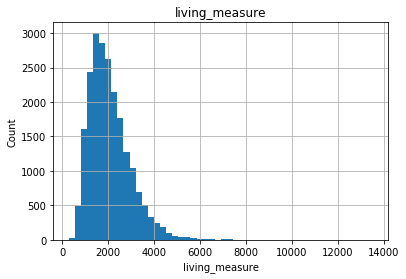

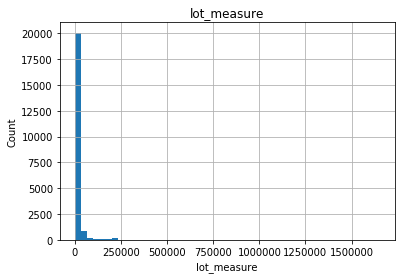

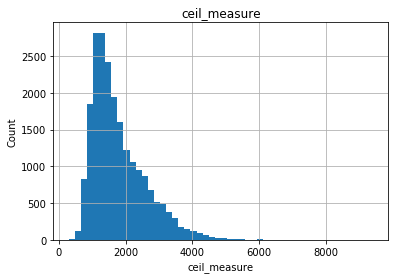

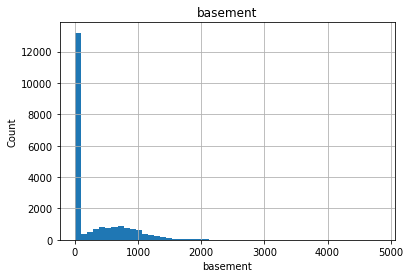

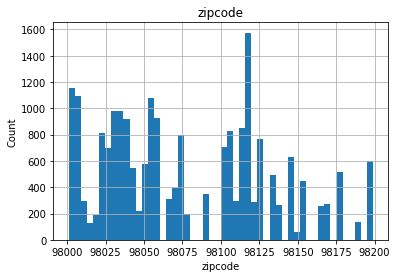

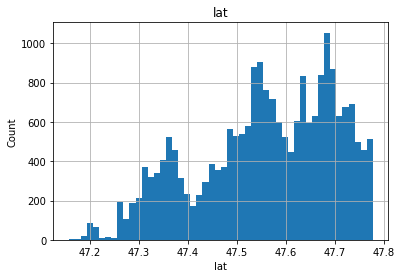

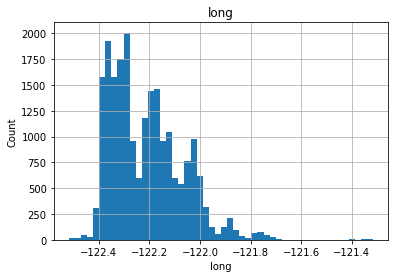

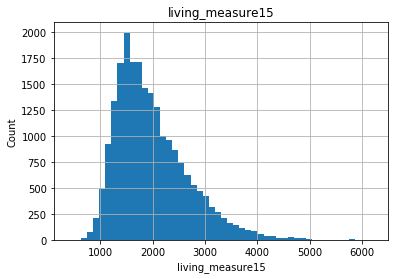

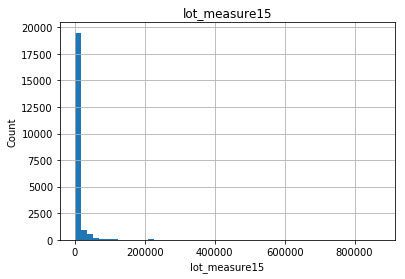

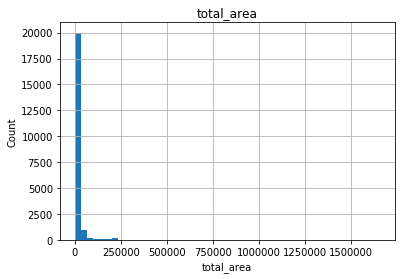

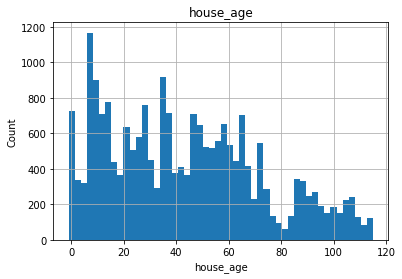

In [25]:
# Viewing the data distribution of all discrete variables
for feature in continuous_feature:
    data_cont=house_df.copy()
    data_cont[feature].hist(bins=50)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

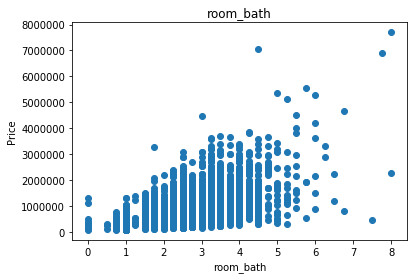

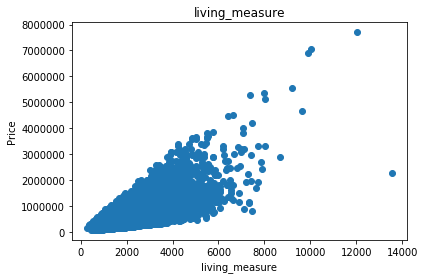

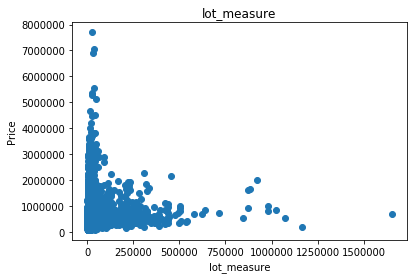

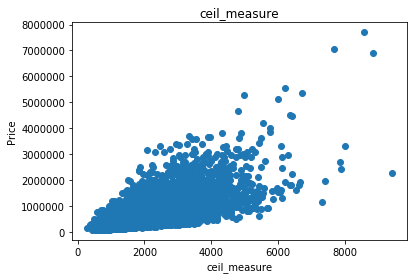

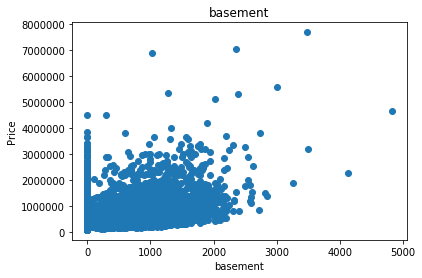

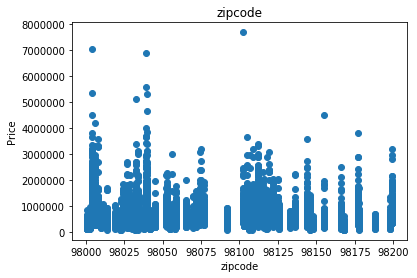

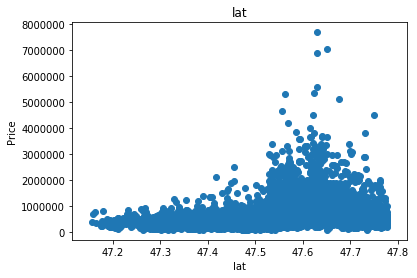

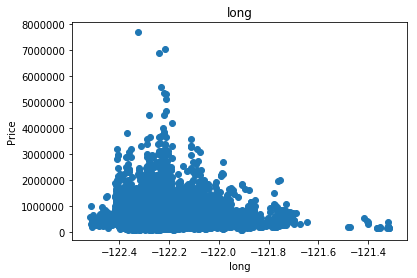

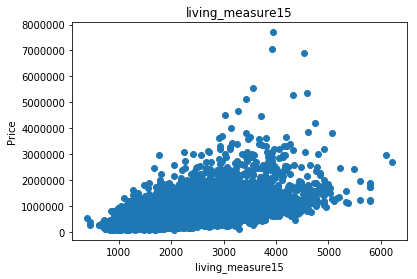

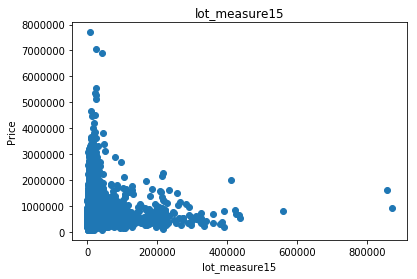

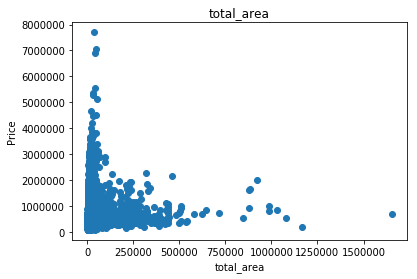

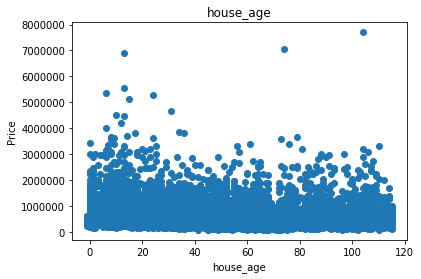

In [32]:
for feature in continuous_feature:
    data_cont=house_df.copy()
    if feature != 'price':
        plt.scatter(data_cont[feature],data_cont['price'])
        plt.xlabel(feature)
        plt.ylabel("Price")
        plt.title(feature)
        plt.show()

In [33]:
'''
**Transforming some numerical variables that are really categorical**

#Changing quality into a categorical variable
#house_df['quality'] = house_df['quality'].astype(str)

#Changing condition into a categorical variable
#house_df['condition'] = house_df['condition'].astype(str)

#Changing room bed into a categorical variable
#house_df['room_bed'] = house_df['room_bed'].astype(str)

#Getting dummy categorical features
#house_df = pd.get_dummies(house_df)

'''

"\n**Transforming some numerical variables that are really categorical**\n\n#Changing quality into a categorical variable\n#house_df['quality'] = house_df['quality'].astype(str)\n\n#Changing condition into a categorical variable\n#house_df['condition'] = house_df['condition'].astype(str)\n\n#Changing room bed into a categorical variable\n#house_df['room_bed'] = house_df['room_bed'].astype(str)\n\n#Getting dummy categorical features\n#house_df = pd.get_dummies(house_df)\n\n"

In [35]:
house_df.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  808100         4       3.25            3020        13457   1.0      0   
1  277500         4       2.50            2550         7500   1.0      0   
2  404000         3       2.50            2370         4324   2.0      0   
3  300000         2       1.00             820         3844   1.0      0   
4  699000         2       1.50            1400         4050   1.0      0   

   sight  condition  quality      ...       zipcode      lat     long  \
0      0          5        9      ...         98133  47.7174 -122.336   
1      0          3        8      ...         98023  47.3165 -122.386   
2      0          3        8      ...         98038  47.3515 -121.999   
3      0          4        6      ...         98133  47.7049 -122.349   
4      0          4        8      ...         98115  47.6768 -122.269   

   living_measure15  lot_measure15  furnished  total_area  sold_in_yr  \
0              2120           7553          1       16477        2014   
1              2260           8800          0       10050        2014   
2              2370           4348          0        6694        2015   
3              1520           3844          0        4664        2014   
4              1900           5940          0        5450        2015   

   house_age  is_renovated  
0         58             0  
1         38             0  
2          9             0  
3         98             0  
4         61             0  

[5 rows x 23 columns]

**Log-transformation of the target variable**

C:\Users\Ramesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


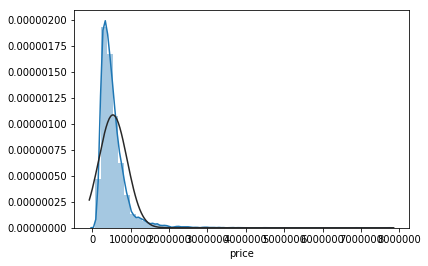

In [36]:
# Plot Histogram for target variable
sns.distplot(house_df['price'] , fit=norm);

**Applying log transform to convert left skewed price target feature to gaussian distribution**


 mu = 13.05 and sigma = 0.53



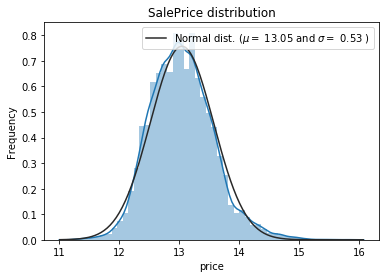

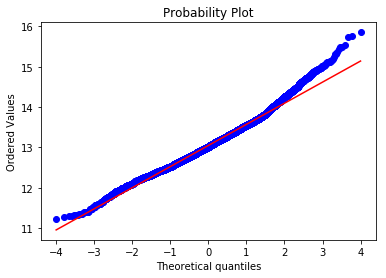

In [37]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
house_df["price"] = np.log1p(house_df["price"])

#Check the new distribution 
sns.distplot(house_df["price"] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(house_df["price"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(house_df["price"], plot=plt)
plt.show()

**Target feature price is converted to gaussian distribution which was earlier right skewed**

#### CORRELATION

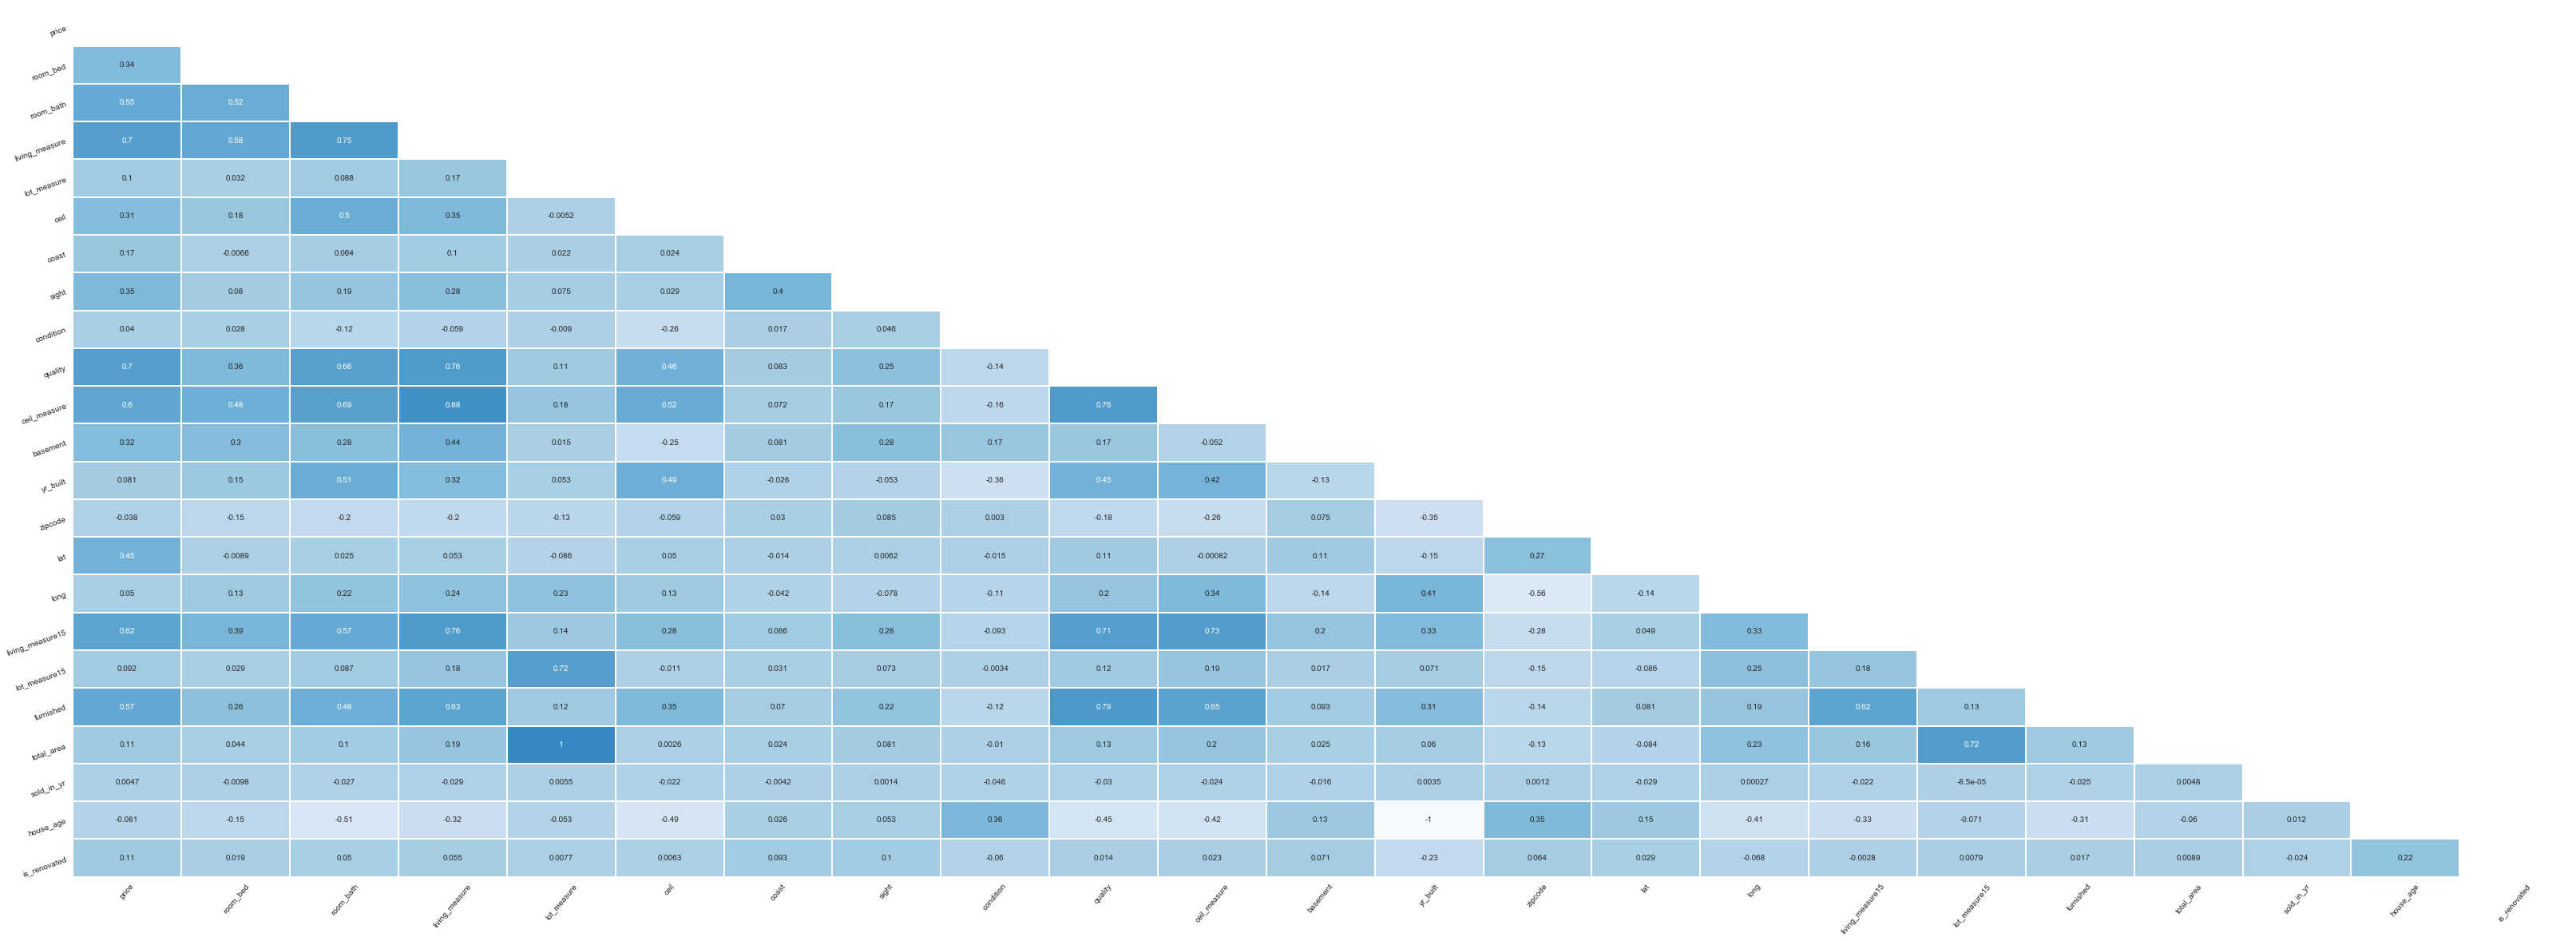

In [38]:
# Correlation Matrix Heatmap
corrmat = house_df.corr()
lower_triangle = np.tril(corrmat, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (56,20))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corrmat.index, yticklabels = corrmat.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

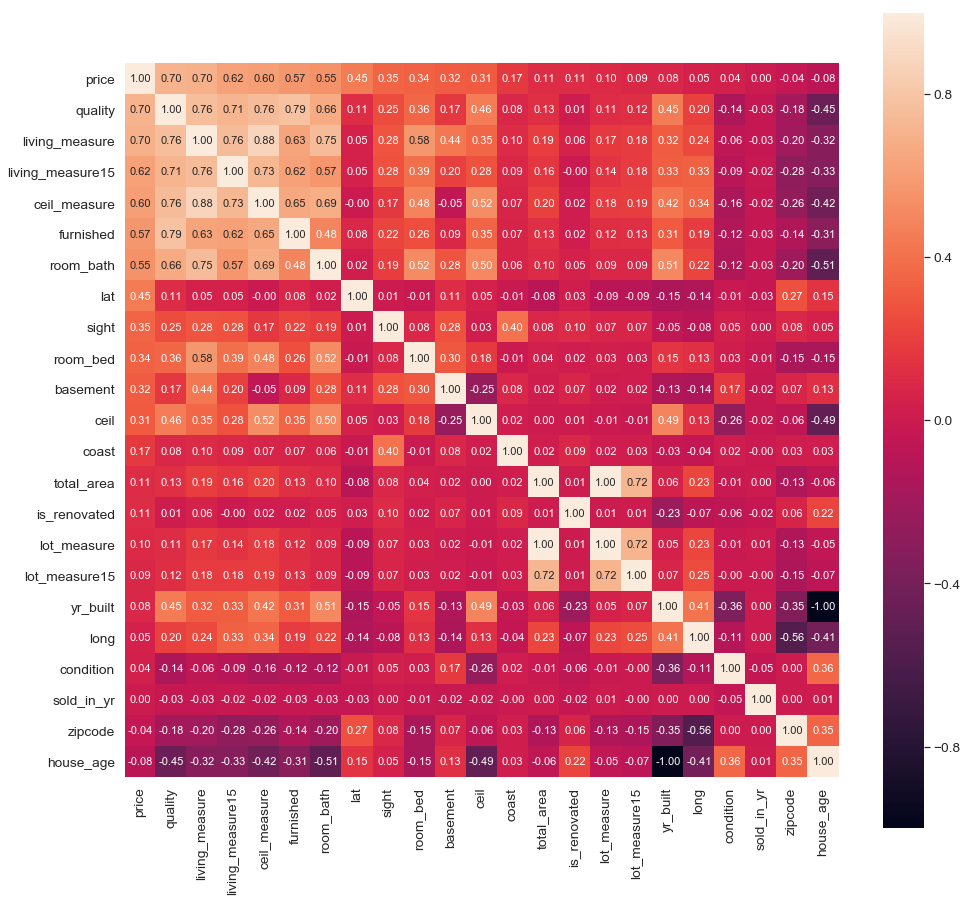

In [39]:
# Top 15 Heatmap
k = 30 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(house_df[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(16, 15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [40]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

Most Correlated Features
0                     price
1                   quality
2            living_measure
3          living_measure15
4              ceil_measure
5                 furnished
6                 room_bath
7                       lat
8                     sight
9                  room_bed
10                 basement
11                     ceil
12                    coast
13               total_area
14             is_renovated
15              lot_measure
16            lot_measure15
17                 yr_built
18                     long
19                condition
20               sold_in_yr
21                  zipcode
22                house_age

In [41]:
most_corr_columns = most_corr.to_string(header=False,
                  index=False,
                  index_names=False).split('\n')
selected_columns = [','.join(ele.split()) for ele in most_corr_columns]
print(selected_columns)

['price', 'quality', 'living_measure', 'living_measure15', 'ceil_measure', 'furnished', 'room_bath', 'lat', 'sight', 'room_bed', 'basement', 'ceil', 'coast', 'total_area', 'is_renovated', 'lot_measure', 'lot_measure15', 'yr_built', 'long', 'condition', 'sold_in_yr', 'zipcode', 'house_age']


### OUTLIER detection and imputation

In [42]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

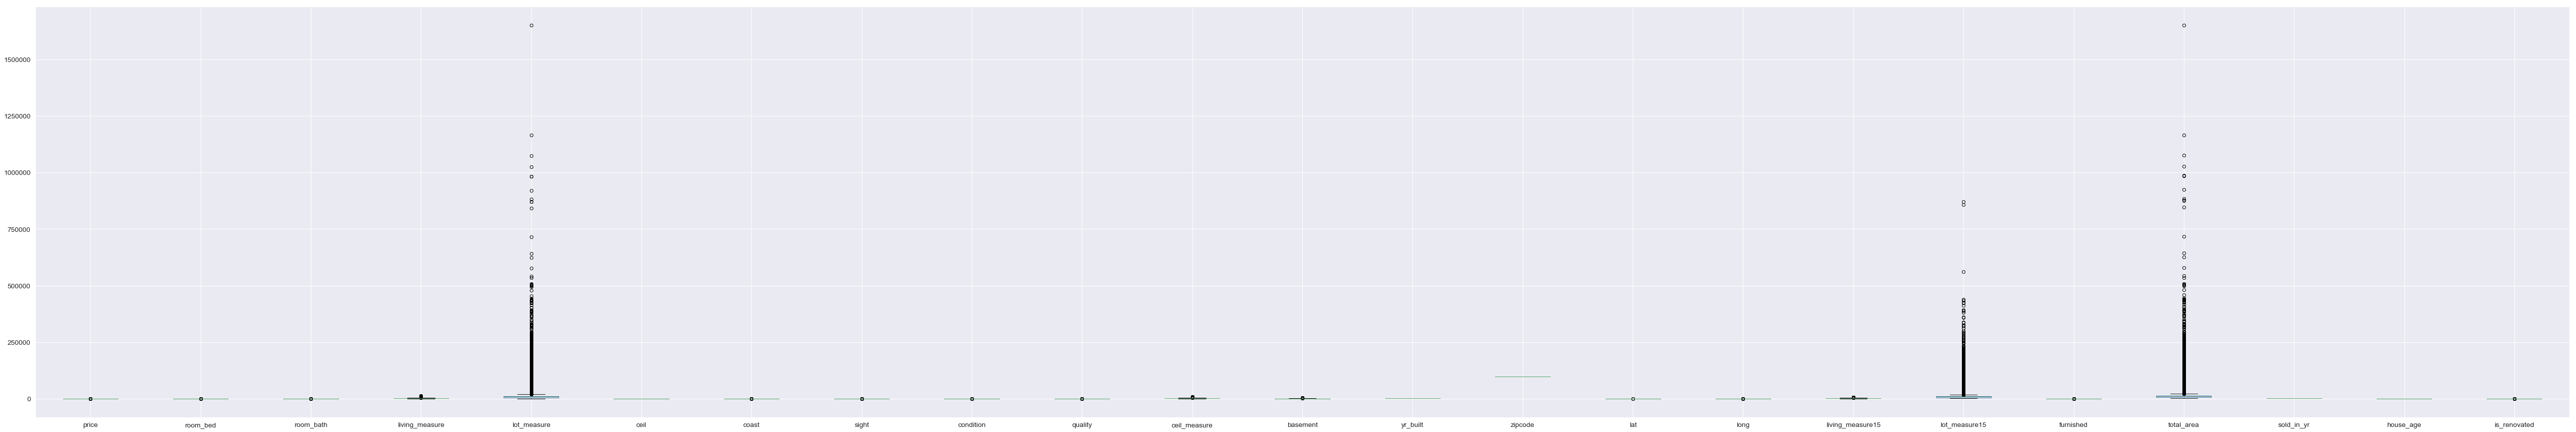

In [43]:
house_df.plot(kind = 'box',figsize=(90,15))
plt.show()

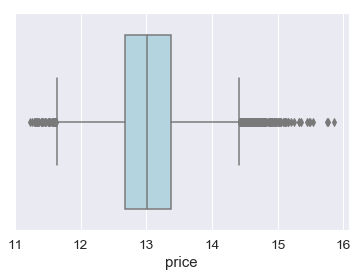

price
lower bound for Outliers :  11.639875878338236
upper bound for Outliers :  14.419285906859946
Outlier values for  price  are values less than  11.639875878338236 and values greater than  14.419285906859946


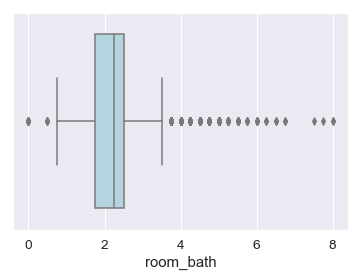

room_bath
lower bound for Outliers :  0.625
upper bound for Outliers :  3.625
Outlier values for  room_bath  are values less than  0.625 and values greater than  3.625


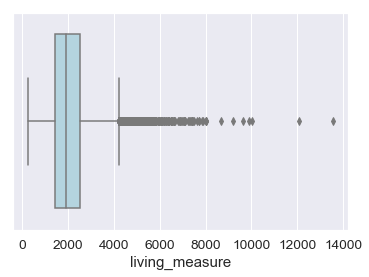

living_measure
lower bound for Outliers :  -257.5
upper bound for Outliers :  4234.5
Outlier values for  living_measure  are values less than  -257.5 and values greater than  4234.5


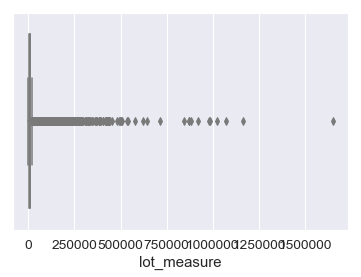

lot_measure
lower bound for Outliers :  -3432.0
upper bound for Outliers :  19160.0
Outlier values for  lot_measure  are values less than  -3432.0 and values greater than  19160.0


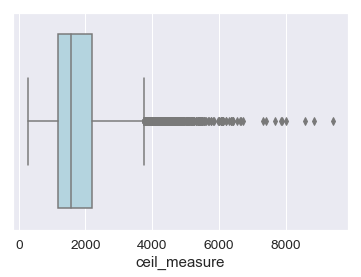

ceil_measure
lower bound for Outliers :  -340.0
upper bound for Outliers :  3740.0
Outlier values for  ceil_measure  are values less than  -340.0 and values greater than  3740.0


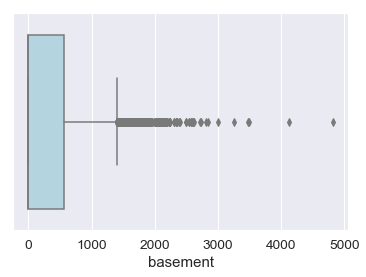

basement
lower bound for Outliers :  -840.0
upper bound for Outliers :  1400.0
Outlier values for  basement  are values less than  -840.0 and values greater than  1400.0


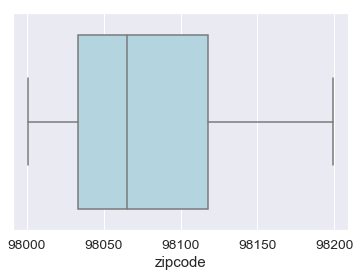

zipcode
lower bound for Outliers :  97905.5
upper bound for Outliers :  98245.5
Outlier values for  zipcode  are values less than  97905.5 and values greater than  98245.5


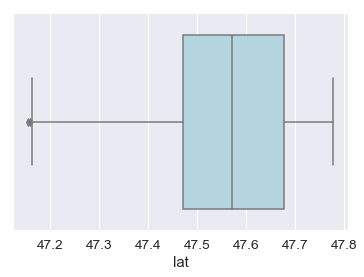

lat
lower bound for Outliers :  47.1605
upper bound for Outliers :  47.9885
Outlier values for  lat  are values less than  47.1605 and values greater than  47.9885


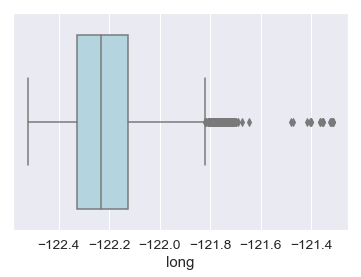

long
lower bound for Outliers :  -122.63249999999996
upper bound for Outliers :  -121.82050000000001
Outlier values for  long  are values less than  -122.63249999999996 and values greater than  -121.82050000000001


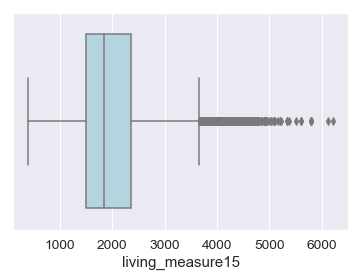

living_measure15
lower bound for Outliers :  185.0
upper bound for Outliers :  3665.0
Outlier values for  living_measure15  are values less than  185.0 and values greater than  3665.0


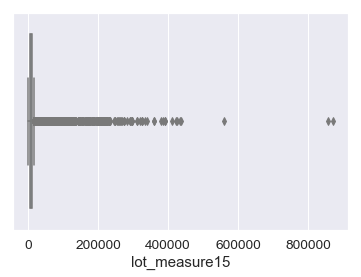

lot_measure15
lower bound for Outliers :  -2374.5
upper bound for Outliers :  17557.5
Outlier values for  lot_measure15  are values less than  -2374.5 and values greater than  17557.5


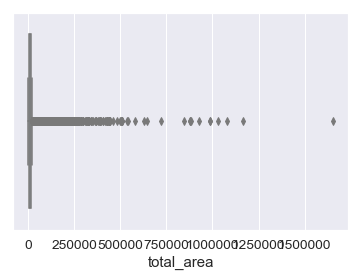

total_area
lower bound for Outliers :  -1912.5
upper bound for Outliers :  21947.5
Outlier values for  total_area  are values less than  -1912.5 and values greater than  21947.5


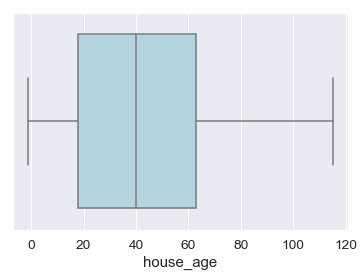

house_age
lower bound for Outliers :  -49.5
upper bound for Outliers :  130.5
Outlier values for  house_age  are values less than  -49.5 and values greater than  130.5


In [44]:
for feature in continuous_feature:
        
        q1 = np.percentile(house_df[feature],25)
        q3 = np.percentile(house_df[feature],75)
        IQR = q3-q1
        outlier_l = q1 - (1.5*IQR)
        outlier_u = q3 + (1.5*IQR)

        sns.boxplot(x= house_df[feature], color='lightblue')
        plt.show()
        print(feature)
        print('lower bound for Outliers : ',outlier_l)
        print('upper bound for Outliers : ',outlier_u)
        print ('Outlier values for ',feature,' are values less than ', outlier_l, 'and values greater than ', outlier_u)

In [45]:
house_df.loc[house_df.room_bath > 3.625, 'room_bath'] = np.nan
house_df.loc[house_df.room_bath <  .625, 'room_bath'] = np.nan

house_df.loc[house_df.living_measure > 4234.5, 'living_measure'] = np.nan
house_df.loc[house_df.lot_measure > 19160, 'lot_measure'] = np.nan
house_df.loc[house_df.ceil_measure > 3740, 'ceil_measure'] = np.nan
house_df.loc[house_df.basement > 1400, 'basement'] = np.nan
house_df.loc[house_df.long > -121.82, 'long'] = np.nan
house_df.loc[house_df.living_measure15 > 3665.0, 'living_measure15'] = np.nan
house_df.loc[house_df.lot_measure15 > 17557.5, 'lot_measure15'] = np.nan
house_df.loc[house_df.total_area > 21947.5, 'total_area'] = np.nan

In [46]:
house_df['room_bath'] = house_df['room_bath'].fillna(house_df['room_bath'].median())
house_df['living_measure'] = house_df['living_measure'].fillna(house_df['living_measure'].median())
house_df['lot_measure'] = house_df['lot_measure'].fillna(house_df['lot_measure'].median())
house_df['ceil_measure'] = house_df['ceil_measure'].fillna(house_df['ceil_measure'].median())
house_df['basement'] = house_df['basement'].fillna(house_df['basement'].median())
house_df['long'] = house_df['long'].fillna(house_df['long'].median())
house_df['living_measure15'] = house_df['living_measure15'].fillna(house_df['living_measure15'].median())
house_df['lot_measure15'] = house_df['lot_measure15'].fillna(house_df['lot_measure15'].median())
house_df['total_area'] = house_df['total_area'].fillna(house_df['total_area'].median())

In [47]:
house_df.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0  13.602442         4       3.25          3020.0      13457.0   1.0      0   
1  12.533580         4       2.50          2550.0       7500.0   1.0      0   
2  12.909173         3       2.50          2370.0       4324.0   2.0      0   
3  12.611541         2       1.00           820.0       3844.0   1.0      0   
4  13.457407         2       1.50          1400.0       4050.0   1.0      0   

   sight  condition  quality      ...       zipcode      lat     long  \
0      0          5        9      ...         98133  47.7174 -122.336   
1      0          3        8      ...         98023  47.3165 -122.386   
2      0          3        8      ...         98038  47.3515 -121.999   
3      0          4        6      ...         98133  47.7049 -122.349   
4      0          4        8      ...         98115  47.6768 -122.269   

   living_measure15  lot_measure15  furnished  total_area  sold_in_yr  \
0            2120.0         7553.0          1     16477.0        2014   
1            2260.0         8800.0          0     10050.0        2014   
2            2370.0         4348.0          0      6694.0        2015   
3            1520.0         3844.0          0      4664.0        2014   
4            1900.0         5940.0          0      5450.0        2015   

   house_age  is_renovated  
0         58             0  
1         38             0  
2          9             0  
3         98             0  
4         61             0  

[5 rows x 23 columns]

# Building Models

**As etablished from EDA , there are few strong predictors of price like Quality,Living Measure etc. However there is multicollinearity between multiple independent features in the housing dataset. Hence linear models are expected to under perform as compared to non-linear models.
Hence we will first implement linear regression as base model & then will try out more complex models like ensemble models.**






In [48]:
# Segragating Independent variables and target variable 'price'
y = house_df[['price']]
X = house_df.drop(labels= "price" , axis = 1)


In [49]:
# Split train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= .30,
                                                    random_state = 1)

###### Scaling independent variables

In [50]:
scaler = StandardScaler() 

In [51]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
X_train_scaled = scaler.transform(X_train)  # transform the train set
X_test_scaled = scaler.transform(X_test)    # transform the test set

In [54]:
# assigning them back to the respective dataframes to retain dataframe structure
X_train.loc[:,:] = X_train_scaled 
X_test.loc[:,:] = X_test_scaled

###### Function to calculate adjusted r-squared 

In [55]:
def adjusted_r2(r2,X):
  adj_r2 = 1 - (1-r2)*(len(X_test) - 1) / (len(X_test) - (X_test.shape[1] - 1) - 1)
  return adj_r2

## Linear Regression & Regulariation

In [56]:
regressor = LinearRegression()  

regressor.fit(X_train, y_train) #training the algorithm
y_pred =regressor.predict(X_test)

r2 =r2_score(np.expm1(y_test),np.expm1(y_pred))
adjusted_r2_Score = adjusted_r2(r2,X_test)

In [57]:
lr_MSE = metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred))
lr_RMSE= np.sqrt(metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred)))

In [58]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Linear Regression'], 'r2 score': r2,'adj r2 score' : adjusted_r2_Score, 'Mean Sq Error': lr_MSE, 'Root Mean Sq Error' : lr_RMSE },index={'1'})
results = results[['Method', 'r2 score','adj r2 score', 'Mean Sq Error', 'Root Mean Sq Error']]
results

Method  r2 score  adj r2 score  Mean Sq Error  \
1  Linear Regression  0.671241      0.670172   4.424246e+10   

   Root Mean Sq Error  
1       210338.918486

### Ridge Regression 

In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.
The penalty term (lambda) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized. 

This technique is used for analyzing multiple regression data that suffer from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value.

#### Coefficients and Scores of Ridge Regression

In [59]:
ridge = Ridge(alpha=0.5)

ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


r2_ridge =r2_score(np.expm1(y_test),np.expm1(y_pred_ridge))

In [60]:
for idx, col_name in enumerate(X_train.columns):
    print("The Ridge coefficient for {} is {} ".format(col_name,ridge.coef_[0][idx]))

The Ridge coefficient for room_bed is 0.012543657723634317 
The Ridge coefficient for room_bath is 0.03984214960706807 
The Ridge coefficient for living_measure is 0.0630376650362494 
The Ridge coefficient for lot_measure is -0.028627984214521052 
The Ridge coefficient for ceil is 0.023536960514613327 
The Ridge coefficient for coast is 0.03704504173395699 
The Ridge coefficient for sight is 0.06251201756652092 
The Ridge coefficient for condition is 0.039588477227349976 
The Ridge coefficient for quality is 0.25062438459998065 
The Ridge coefficient for ceil_measure is 0.01125800952450452 
The Ridge coefficient for basement is 0.01986262546217631 
The Ridge coefficient for yr_built is -0.055727863795379404 
The Ridge coefficient for zipcode is -0.04303130975301816 
The Ridge coefficient for lat is 0.1883838221164335 
The Ridge coefficient for long is -0.007355154194400701 
The Ridge coefficient for living_measure15 is 0.0518500605090113 
The Ridge coefficient for lot_measure15 is -0.0

In [61]:
rfridge_MSE = metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred_ridge))
rfridge_RMSE = np.sqrt(metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred_ridge)))

In [62]:
tempResultsDf =  pd.DataFrame({'Method':['Ridge Regression'], 'r2 score': r2_ridge,'adj r2 score' :str(adjusted_r2(r2_ridge,X_test)) , 'Mean Sq Error': rfridge_MSE, 'Root Mean Sq Error' : rfridge_RMSE },index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'r2 score','adj r2 score', 'Mean Sq Error', 'Root Mean Sq Error']]
results

Method  r2 score      adj r2 score  Mean Sq Error  \
1  Linear Regression  0.671241          0.670172   4.424246e+10   
2   Ridge Regression  0.671230  0.67016169596895   4.424386e+10   

   Root Mean Sq Error  
1       210338.918486  
2       210342.241004

### Lasso Regression 

Lasso regression is a type of regression analysis in which both variable selection and regulization occurs simultaneously. This method uses a penalty which affects the value of coefficients of regression. As penalty increases more coefficients are becomes zero and vice versa.

This technique not only helps in reducing over-fitting but it can help us in feature selection.

###### Impact of high penalty value of alpha on coeffecients

In [63]:
lasso = Lasso(alpha=0.0002)

lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)

r2_lasso =r2_score(np.expm1(y_test),np.expm1(y_pred_lasso))

In [64]:
for idx, col_name in enumerate(X_train.columns):
    print("The Lasso coefficient for {} is {} ".format(col_name,lasso.coef_[idx]))

The Lasso coefficient for room_bed is 0.012554903981056088 
The Lasso coefficient for room_bath is 0.039810080928230525 
The Lasso coefficient for living_measure is 0.06359897463912255 
The Lasso coefficient for lot_measure is -0.024574499039581987 
The Lasso coefficient for ceil is 0.023390070300228598 
The Lasso coefficient for coast is 0.0369256402270526 
The Lasso coefficient for sight is 0.062461387883443194 
The Lasso coefficient for condition is 0.039401156918514674 
The Lasso coefficient for quality is 0.2507026340682682 
The Lasso coefficient for ceil_measure is 0.011221067622320773 
The Lasso coefficient for basement is 0.019818722668472757 
The Lasso coefficient for yr_built is -0.10391954266950844 
The Lasso coefficient for zipcode is -0.04242791025934769 
The Lasso coefficient for lat is 0.18817407162944988 
The Lasso coefficient for long is -0.006937376524934953 
The Lasso coefficient for living_measure15 is 0.05171418952142131 
The Lasso coefficient for lot_measure15 is 

In [65]:
coeff_used_param = np.sum(lasso.coef_!=0)

In [66]:
print ("number of features used: for alpha =0.002:", coeff_used_param)

number of features used: for alpha =0.002: 22


In [67]:
rlasso_MSE = metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred_lasso))
rlasso_RMSE = np.sqrt(metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred_lasso)))

In [68]:
tempResultsDf =  pd.DataFrame({'Method':['Lasso Regression'], 'r2 score': r2_lasso,'adj r2 score' :str(adjusted_r2(r2_lasso,X_test)) , 'Mean Sq Error': rlasso_MSE, 'Root Mean Sq Error' : rfridge_RMSE },index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'r2 score','adj r2 score', 'Mean Sq Error', 'Root Mean Sq Error']]
results

Method  r2 score        adj r2 score  Mean Sq Error  \
1  Linear Regression  0.671241            0.670172   4.424246e+10   
2   Ridge Regression  0.671230    0.67016169596895   4.424386e+10   
3   Lasso Regression  0.671109  0.6700399604612102   4.426019e+10   

   Root Mean Sq Error  
1       210338.918486  
2       210342.241004  
3       210342.241004

## Support Vector Regression

In [69]:
reg_s = SVR(kernel='rbf')
reg_s.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
pred_svr = reg_s.predict(X_test)
r2_svr =r2_score(np.expm1(y_test),np.expm1(pred_svr))
adjusted_r2_Score_svr = adjusted_r2(r2_svr,X_test)

In [71]:
svr_MSE = metrics.mean_squared_error(np.expm1(y_test),np.expm1(pred_svr))
svr_RMSE = np.sqrt(metrics.mean_squared_error(np.expm1(y_test),np.expm1(pred_svr)))

In [72]:
tempResultsDf =  pd.DataFrame({'Method':['Support Vector Regression'], 'r2 score': r2_svr,'adj r2 score' :str(adjusted_r2(r2_svr,X_test)) , 'Mean Sq Error': svr_MSE, 'Root Mean Sq Error' : svr_RMSE },index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'r2 score','adj r2 score', 'Mean Sq Error', 'Root Mean Sq Error']]
results

Method  r2 score        adj r2 score  Mean Sq Error  \
1          Linear Regression  0.671241            0.670172   4.424246e+10   
2           Ridge Regression  0.671230    0.67016169596895   4.424386e+10   
3           Lasso Regression  0.671109  0.6700399604612102   4.426019e+10   
4  Support Vector Regression  0.774583  0.7738505268277169   3.033524e+10   

   Root Mean Sq Error  
1       210338.918486  
2       210342.241004  
3       210342.241004  
4       174170.156644

## Decision Tree Regressor

In [73]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [74]:
y_pred_dt =dt_model.predict(X_test)
r2_decisiontree =r2_score(np.expm1(y_test),np.expm1(y_pred_dt))
adjusted_r2_Score_dt = adjusted_r2(r2_decisiontree,X_test)

In [75]:
y_pred_dt

array([12.88904575, 12.70533467, 13.39391759, ..., 12.97537267,
       14.22762087, 13.32121588])

In [76]:
dt_MSE = metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred_dt))
dt_RMSE = np.sqrt(metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred_dt)))

In [77]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf =  pd.DataFrame({'Method':['Decision Tree'], 'r2 score': r2_decisiontree,'adj r2 score' : adjusted_r2_Score_dt , 'Mean Sq Error': dt_MSE, 'Root Mean Sq Error' : dt_RMSE },index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'r2 score','adj r2 score', 'Mean Sq Error', 'Root Mean Sq Error']]
results

Method  r2 score        adj r2 score  Mean Sq Error  \
1          Linear Regression  0.671241            0.670172   4.424246e+10   
2           Ridge Regression  0.671230    0.67016169596895   4.424386e+10   
3           Lasso Regression  0.671109  0.6700399604612102   4.426019e+10   
4  Support Vector Regression  0.774583  0.7738505268277169   3.033524e+10   
5              Decision Tree  0.718660            0.717746   3.786103e+10   

   Root Mean Sq Error  
1       210338.918486  
2       210342.241004  
3       210342.241004  
4       174170.156644  
5       194579.119959

#### Listing important features

In [78]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
room_bed          0.003139
room_bath         0.004830
living_measure    0.141028
lot_measure       0.009115
ceil              0.001564
coast             0.008078
sight             0.007826
condition         0.003645
quality           0.046337
ceil_measure      0.013831
basement          0.003195
yr_built          0.007533
zipcode           0.011130
lat               0.295549
long              0.048423
living_measure15  0.025589
lot_measure15     0.008606
furnished         0.330115
total_area        0.008059
sold_in_yr        0.002438
house_age         0.019160
is_renovated      0.000809


## K Nearest Neighbors (KNN)

###### Identifying best K Value

In [79]:
scores = []
for k in range (1,10):
    NNH = KNeighborsRegressor(n_neighbors=k,weights= 'distance')
    NNH.fit(X_train,y_train)
    y_pred_KNN =NNH.predict(X_test)
    from sklearn.metrics import r2_score
    r2_KNN =r2_score(np.expm1(y_test),np.expm1(y_pred_KNN))
    scores.append(r2_KNN)
    

###### k value is chosen to be 3, where the model seems to output peak scores.

Text(0.5, 0, 'Value of K for KNN')

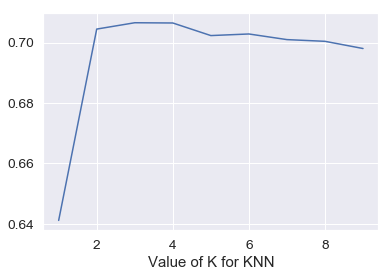

In [80]:
plt.plot(range(1,10),scores)
plt.xlabel('Value of K for KNN')

In [81]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [82]:
predictions_knn = neigh.predict(X_test)

r2_knn =r2_score(np.expm1(y_test),np.expm1(predictions_knn))
adjusted_r2_Score_knn = adjusted_r2(r2_knn,X_test)

In [83]:
knn_MSE = metrics.mean_squared_error(np.expm1(y_test),np.expm1(predictions_knn))
knn_RMSE = np.sqrt(metrics.mean_squared_error(np.expm1(y_test),np.expm1(predictions_knn)))

In [84]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsknn =  pd.DataFrame({'Method':['KNN'], 'r2 score': r2_knn,'adj r2 score' : adjusted_r2_Score_knn, 'Mean Sq Error': knn_MSE, 'Root Mean Sq Error' : knn_RMSE },index={'6'})
results = pd.concat([results, tempResultsknn])
results = results[['Method', 'r2 score','adj r2 score', 'Mean Sq Error', 'Root Mean Sq Error']]
results

Method  r2 score        adj r2 score  Mean Sq Error  \
1          Linear Regression  0.671241            0.670172   4.424246e+10   
2           Ridge Regression  0.671230    0.67016169596895   4.424386e+10   
3           Lasso Regression  0.671109  0.6700399604612102   4.426019e+10   
4  Support Vector Regression  0.774583  0.7738505268277169   3.033524e+10   
5              Decision Tree  0.718660            0.717746   3.786103e+10   
6                        KNN  0.700865            0.699893   4.025575e+10   

   Root Mean Sq Error  
1       210338.918486  
2       210342.241004  
3       210342.241004  
4       174170.156644  
5       194579.119959  
6       200638.354386

# Improving Model Performance

## Ensemble Modeling

Ensemble modeling is a process where multiple diverse models are created to predict an outcome, either by using many different modeling algorithms or using different training data sets. The ensemble model then aggregates the prediction of each base model and results in once final prediction for the unseen data. The motivation for using ensemble models is to reduce the generalization error of the prediction.

#### Importing required libraries

In [85]:
# Import machine learning ensemble regression libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Import libraries to perform cross validation and hyper parameter tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Gradient Boost

In [86]:
gbmTree = GradientBoostingRegressor(n_estimators=50)

gbmTree.fit(X_train,y_train)
y_pred_gb = gbmTree.predict(X_test)

#print("gbmTree on training" , gbmTree.score(X_train, y_train))
#print("gbmTree on test data ",gbmTree.score(X_test,y_test))

In [87]:
r2_gradientboost =r2_score(np.expm1(y_test),np.expm1(y_pred_gb))

print("r2 score for GradientBoostingRegressor " + str(r2_gradientboost))
print("adjusted r2 for GradientBoostingRegressor" +  str(adjusted_r2(r2_gradientboost,X_test)))

r2 score for GradientBoostingRegressor 0.7601148444714325
adjusted r2 for GradientBoostingRegressor0.7593352733996126


In [88]:
gbm_MSE = metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred_gb))
gbm_RMSE = np.sqrt(metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred_gb)))

In [89]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf =  pd.DataFrame({'Method':['Gradient Boost'], 'r2 score': r2_gradientboost,'adj r2 score' : str(adjusted_r2(r2_gradientboost,X_test)) , 'Mean Sq Error': gbm_MSE, 'Root Mean Sq Error' : gbm_RMSE },index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'r2 score','adj r2 score', 'Mean Sq Error', 'Root Mean Sq Error']]
results

Method  r2 score        adj r2 score  Mean Sq Error  \
1          Linear Regression  0.671241            0.670172   4.424246e+10   
2           Ridge Regression  0.671230    0.67016169596895   4.424386e+10   
3           Lasso Regression  0.671109  0.6700399604612102   4.426019e+10   
4  Support Vector Regression  0.774583  0.7738505268277169   3.033524e+10   
5              Decision Tree  0.718660            0.717746   3.786103e+10   
6                        KNN  0.700865            0.699893   4.025575e+10   
7             Gradient Boost  0.760115  0.7593352733996126   3.228229e+10   

   Root Mean Sq Error  
1       210338.918486  
2       210342.241004  
3       210342.241004  
4       174170.156644  
5       194579.119959  
6       200638.354386  
7       179672.732708

## Bagging Regressor

In [90]:
bgcl = BaggingRegressor(n_estimators=50, oob_score= True)
bgcl = bgcl.fit(X_train,y_train)
y_pred_bgcl = bgcl.predict(X_test)

r2_bagging =r2_score(np.expm1(y_test),np.expm1(y_pred_bgcl))

In [91]:

print("r2 score for BaggingRegressor " + str(r2_bagging))
print("adjusted r2 for BaggingRegressor" +  str(adjusted_r2(r2_bagging,X_test)))

r2 score for BaggingRegressor 0.8421886986820679
adjusted r2 for BaggingRegressor0.8416758485849345


In [92]:
bgcl_MSE = metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred_bgcl))
bgcl_RMSE = np.sqrt(metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred_bgcl)))

In [93]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf =  pd.DataFrame({'Method':['Bagging Regressor'], 'r2 score': r2_bagging,'adj r2 score' :str(adjusted_r2(r2_bagging,X_test)) , 'Mean Sq Error': bgcl_MSE, 'Root Mean Sq Error' : bgcl_RMSE },index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'r2 score','adj r2 score', 'Mean Sq Error', 'Root Mean Sq Error']]
results

Method  r2 score        adj r2 score  Mean Sq Error  \
1          Linear Regression  0.671241            0.670172   4.424246e+10   
2           Ridge Regression  0.671230    0.67016169596895   4.424386e+10   
3           Lasso Regression  0.671109  0.6700399604612102   4.426019e+10   
4  Support Vector Regression  0.774583  0.7738505268277169   3.033524e+10   
5              Decision Tree  0.718660            0.717746   3.786103e+10   
6                        KNN  0.700865            0.699893   4.025575e+10   
7             Gradient Boost  0.760115  0.7593352733996126   3.228229e+10   
8          Bagging Regressor  0.842189  0.8416758485849345   2.123729e+10   

   Root Mean Sq Error  
1       210338.918486  
2       210342.241004  
3       210342.241004  
4       174170.156644  
5       194579.119959  
6       200638.354386  
7       179672.732708  
8       145730.191883

## Random Forest

In [94]:
rfTree = RandomForestRegressor(n_estimators=50)
rfTree.fit(X_train,y_train)
y_pred_rfTree = rfTree.predict(X_test)


In [95]:
#r2_random_forest = rfTree.score(X_test,y_test)
r2_random_forest =r2_score(np.expm1(y_test),np.expm1(y_pred_rfTree))

print("r2 score for RandomForestRegressor " + str(r2_random_forest))
print("adjusted r2 for RandomForestRegressor" +  str(adjusted_r2(r2_random_forest,X_test)))

r2 score for RandomForestRegressor 0.8374111264656491
adjusted r2 for RandomForestRegressor0.8368827503678122


In [96]:
rftree_MSE = metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred_rfTree))
rftree_RMSE = np.sqrt(metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred_rfTree)))


In [97]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf =  pd.DataFrame({'Method':['Random Forest'], 'r2 score': r2_random_forest,'adj r2 score' :str(adjusted_r2(r2_random_forest,X_test)) , 'Mean Sq Error': rftree_MSE, 'Root Mean Sq Error' : rftree_RMSE },index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'r2 score','adj r2 score', 'Mean Sq Error', 'Root Mean Sq Error']]
results

Method  r2 score        adj r2 score  Mean Sq Error  \
1          Linear Regression  0.671241            0.670172   4.424246e+10   
2           Ridge Regression  0.671230    0.67016169596895   4.424386e+10   
3           Lasso Regression  0.671109  0.6700399604612102   4.426019e+10   
4  Support Vector Regression  0.774583  0.7738505268277169   3.033524e+10   
5              Decision Tree  0.718660            0.717746   3.786103e+10   
6                        KNN  0.700865            0.699893   4.025575e+10   
7             Gradient Boost  0.760115  0.7593352733996126   3.228229e+10   
8          Bagging Regressor  0.842189  0.8416758485849345   2.123729e+10   
9              Random Forest  0.837411  0.8368827503678122   2.188023e+10   

   Root Mean Sq Error  
1       210338.918486  
2       210342.241004  
3       210342.241004  
4       174170.156644  
5       194579.119959  
6       200638.354386  
7       179672.732708  
8       145730.191883  
9       147919.659106

## XGBoost Regressor

In [98]:
#import sys
#!{sys.executable} -m pip install xgboost

In [99]:
xgboost = XGBRegressor(learning_rate=0.01,
                                            n_estimators=6000,
                                            max_depth=4,
                                            min_child_weight=0,
                                            gamma=0.6,
                                            subsample=0.7,
                                            colsample_bytree=0.7,
                                            objective='reg:linear',
                                            nthread=-1,
                                            scale_pos_weight=1,
                                            seed=27,
                                            reg_alpha=0.00006,
                                            random_state=42,
                      n_jobs=-1)

xgboost.fit(X_train,y_train)



y_pred_xgb = xgboost.predict(X_test)

r2_xgb =r2_score(np.expm1(y_test),np.expm1(y_pred_xgb))

xgb_MSE = metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred_xgb))
xgb_RMSE = np.sqrt(metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred_xgb)))




[05:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [100]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf =  pd.DataFrame({'Method':['XG Boost Regressor'], 'r2 score': r2_xgb,'adj r2 score' :str(adjusted_r2(r2_xgb,X_test)) , 'Mean Sq Error': xgb_MSE, 'Root Mean Sq Error' : xgb_RMSE },index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'r2 score','adj r2 score', 'Mean Sq Error', 'Root Mean Sq Error']]
results

Method  r2 score        adj r2 score  Mean Sq Error  \
1           Linear Regression  0.671241            0.670172   4.424246e+10   
2            Ridge Regression  0.671230    0.67016169596895   4.424386e+10   
3            Lasso Regression  0.671109  0.6700399604612102   4.426019e+10   
4   Support Vector Regression  0.774583  0.7738505268277169   3.033524e+10   
5               Decision Tree  0.718660            0.717746   3.786103e+10   
6                         KNN  0.700865            0.699893   4.025575e+10   
7              Gradient Boost  0.760115  0.7593352733996126   3.228229e+10   
8           Bagging Regressor  0.842189  0.8416758485849345   2.123729e+10   
9               Random Forest  0.837411  0.8368827503678122   2.188023e+10   
10         XG Boost Regressor  0.876275  0.8758724932652224   1.665022e+10   

    Root Mean Sq Error  
1        210338.918486  
2        210342.241004  
3        210342.241004  
4        174170.156644  
5        194579.119959  
6        200638.354386  
7        179672.732708  
8        145730.191883  
9        147919.659106  
10       129035.725598

## Light GBM Regressor


In [101]:
#import sys
#!{sys.executable} -m pip install lightgbm

In [102]:
# Light Gradient Boosting Regressor

lightgbm = LGBMRegressor(n_jobs=-1)

lightgbm.fit(X_train,y_train)

y_pred_lgb = lightgbm.predict(X_test)

r2_lgb =r2_score(np.expm1(y_test),np.expm1(y_pred_lgb))
adjusted_r2_lgb = adjusted_r2(r2_lgb,X_test)

lgb_MSE = metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred_lgb))
lgb_RMSE = np.sqrt(lgb_MSE)

In [103]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf =  pd.DataFrame({'Method':['Light GBM Regressor'], 'r2 score': r2_lgb,'adj r2 score' :str(adjusted_r2(r2_lgb,X_test)) , 'Mean Sq Error': lgb_MSE, 'Root Mean Sq Error' : lgb_RMSE },index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'r2 score','adj r2 score', 'Mean Sq Error', 'Root Mean Sq Error']]
results

Method  r2 score        adj r2 score  Mean Sq Error  \
1           Linear Regression  0.671241            0.670172   4.424246e+10   
2            Ridge Regression  0.671230    0.67016169596895   4.424386e+10   
3            Lasso Regression  0.671109  0.6700399604612102   4.426019e+10   
4   Support Vector Regression  0.774583  0.7738505268277169   3.033524e+10   
5               Decision Tree  0.718660            0.717746   3.786103e+10   
6                         KNN  0.700865            0.699893   4.025575e+10   
7              Gradient Boost  0.760115  0.7593352733996126   3.228229e+10   
8           Bagging Regressor  0.842189  0.8416758485849345   2.123729e+10   
9               Random Forest  0.837411  0.8368827503678122   2.188023e+10   
10         XG Boost Regressor  0.876275  0.8758724932652224   1.665022e+10   
11        Light GBM Regressor  0.868813  0.8683871596840202   1.765429e+10   

    Root Mean Sq Error  
1        210338.918486  
2        210342.241004  
3        210342.241004  
4        174170.156644  
5        194579.119959  
6        200638.354386  
7        179672.732708  
8        145730.191883  
9        147919.659106  
10       129035.725598  
11       132869.433416

## K-Fold cross validation to validate performance of model against unseen data

In [104]:
scores = cross_val_score(regressor, X,np.expm1(y), cv=10)
print('Cross-validated scores: Linear Regression', scores)

Cross-validated scores: Linear Regression [0.63212543 0.65455653 0.62389831 0.64838009 0.66053439 0.65601296
 0.63027183 0.59776333 0.6171731  0.61260028]


In [105]:
scores = cross_val_score(reg_s, X,np.expm1(y), cv=10)
print('Cross-validated scores: Support Vector Regression', scores)

Cross-validated scores: Support Vector Regression [-0.05748032 -0.06053739 -0.06253873 -0.07680835 -0.05821499 -0.07149102
 -0.0665099  -0.05059651 -0.05503229 -0.05114378]


In [106]:
scores = cross_val_score(dt_model, X, np.expm1(y), cv=10)
print('Cross-validated scores: Decision Tree', scores)

Cross-validated scores: Decision Tree [0.66717959 0.71681639 0.69829263 0.71286346 0.64779492 0.60246751
 0.69298247 0.68970339 0.74517985 0.69318695]


In [107]:
scores = cross_val_score(neigh, X, np.expm1(y), cv=10)
print('Cross-validated scores: KNN', scores)

Cross-validated scores: KNN [0.36656887 0.45239608 0.43306889 0.39344798 0.37191962 0.45150757
 0.43743196 0.33714084 0.45834601 0.44547857]


In [108]:
scores = cross_val_score(gbmTree, X, np.expm1(y.values.ravel()), cv=10)
print('Cross-validated scores: Gradient Boosting', scores)

Cross-validated scores: Gradient Boosting [0.83648948 0.82099367 0.80404212 0.83823297 0.83877003 0.82810562
 0.78824696 0.80608306 0.80277791 0.79913556]


In [109]:
scores = cross_val_score(bgcl, X, np.expm1(y.values.ravel()), cv=10)
print('Cross-validated scores: Bagging', scores)

Cross-validated scores: Bagging [0.88921066 0.85819631 0.86523162 0.88193023 0.84086466 0.86551309
 0.83944073 0.82165253 0.85864301 0.8206623 ]


In [110]:
scores = cross_val_score(rfTree, X, np.expm1(y.values.ravel()), cv=10)
print('Cross-validated scores: Random Forest', scores)

Cross-validated scores: Random Forest [0.88126584 0.86608384 0.87175002 0.88282562 0.83446431 0.86799592
 0.84977641 0.82488901 0.86099228 0.8250972 ]


In [111]:
scores = cross_val_score(xgboost, X, np.expm1(y.values.ravel()), cv=5)
print('Cross-validated scores: XGBoost', scores)

[06:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[06:09:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[06:11:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[06:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[06:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Cross-validated scores: XGBoost [0.91133609 0.9037308  0.89291631 0.86741526 0.89151837]


In [112]:
scores = cross_val_score(lightgbm, X, np.expm1(y.values.ravel()), cv=10)
print('Cross-validated scores: LightGBM', scores)

Cross-validated scores: LightGBM [0.89132781 0.88180659 0.88344607 0.90052448 0.87595746 0.89464349
 0.87491229 0.85788009 0.89100626 0.87003166]


## Model Tuning using hyper parameters

We will further tune our best performing model - XGBoost Regressor with range of hyperparameters to boost performance. We will use **GridSearchCV**

#### GridSearchCV

In [113]:
#existing parameters in use 
xgboost.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0.6, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=0, missing=nan, monotone_constraints=None,
       n_estimators=6000, n_jobs=-1, nthread=-1, num_parallel_tree=1,
       objective='reg:linear', random_state=42, reg_alpha=6e-05,
       reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.7,
       tree_method=None, validate_parameters=False, verbosity=None)>

In [114]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05,], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  24 out of  24 | elapsed:  1.9min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'nthread': [4], 'objective': ['reg:squarederror'], 'learning_rate': [0.03, 0.05], 'max_depth': [5, 6, 7], 'min_child_weight': [4], 'silent': [1], 'subsample': [0.7], 'colsample_bytree': [0.7], 'n_estimators': [500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [115]:
xgb_best = xgb_grid.best_estimator_

In [116]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 6,
 'min_child_weight': 4,
 'n_estimators': 1000,
 'nthread': 4,
 'objective': 'reg:squarederror',
 'silent': 1,
 'subsample': 0.7}

In [117]:
y_pred_xgb_best = xgb_best.predict(X_test)

In [118]:
r2_xgb_best =r2_score(np.expm1(y_test),np.expm1(y_pred_xgb_best))
adjusted_r2_Score = adjusted_r2(r2,X_test)

In [119]:
xgb_MSE_best = metrics.mean_squared_error(np.expm1(y_test),np.expm1(y_pred_xgb_best))
xgb_RMSE_best = np.sqrt(xgb_MSE_best)

In [120]:
print("r2 score for XGBoost Regressor : " + str(r2_xgb_best))
print("adjusted r2 for XGBoost Regressor :" +  str(adjusted_r2(r2_xgb_best,X_test)))
print("MSE for XGBoost Regressor :" +  str(xgb_MSE_best))
print("RMSE for XGBoost Regressor : " +  str(xgb_RMSE_best))

r2 score for XGBoost Regressor : 0.895357017245776
adjusted r2 for XGBoost Regressor :0.8950169518422108
MSE for XGBoost Regressor :14082218635.97307
RMSE for XGBoost Regressor : 118668.52420070399


In [121]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf =  pd.DataFrame({'Method':['XG Boost Regressor with HyperParameter Tuning'], 'r2 score': r2_xgb_best,'adj r2 score' :str(adjusted_r2(r2_xgb_best,X_test)) , 'Mean Sq Error': xgb_MSE_best, 'Root Mean Sq Error' : xgb_RMSE_best },index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'r2 score','adj r2 score', 'Mean Sq Error', 'Root Mean Sq Error']]
results.sort_values(by='Root Mean Sq Error',ascending=True)

Method  r2 score  \
12  XG Boost Regressor with HyperParameter Tuning  0.895357   
10                             XG Boost Regressor  0.876275   
11                            Light GBM Regressor  0.868813   
8                               Bagging Regressor  0.842189   
9                                   Random Forest  0.837411   
4                       Support Vector Regression  0.774583   
7                                  Gradient Boost  0.760115   
5                                   Decision Tree  0.718660   
6                                             KNN  0.700865   
1                               Linear Regression  0.671241   
2                                Ridge Regression  0.671230   
3                                Lasso Regression  0.671109   

          adj r2 score  Mean Sq Error  Root Mean Sq Error  
12  0.8950169518422108   1.408222e+10       118668.524201  
10  0.8758724932652224   1.665022e+10       129035.725598  
11  0.8683871596840202   1.765429e+10       132869.433416  
8   0.8416758485849345   2.123729e+10       145730.191883  
9   0.8368827503678122   2.188023e+10       147919.659106  
4   0.7738505268277169   3.033524e+10       174170.156644  
7   0.7593352733996126   3.228229e+10       179672.732708  
5             0.717746   3.786103e+10       194579.119959  
6             0.699893   4.025575e+10       200638.354386  
1             0.670172   4.424246e+10       210338.918486  
2     0.67016169596895   4.424386e+10       210342.241004  
3   0.6700399604612102   4.426019e+10       210342.241004

# Model Comparison

R-square test is used to determine the goodness of fit in regression analysis. Goodness of fit implies how better regression model is fitted to the data points. More is the value of r-square near to 1, better is the model.The value of r-square always increases as new variables(attributes) are added to the model, no matter that the newly added attributes have a positive impact on the model or not. Also, it can lead to over fitting of the model if there are large no. of variables.

Adjusted r-square is a modified form of r-square whose value increases if new predictors tend to improve model’s performance and decreases if new predictors do not improve the performance as expected.

The MSE is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.
The mean squared error (MSE) of an estimator measures the average of the squares of the errors ie; the average squared difference between the estimated values and the actual value.

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [122]:
results.sort_values(by='Root Mean Sq Error',ascending=True)

Method  r2 score  \
12  XG Boost Regressor with HyperParameter Tuning  0.895357   
10                             XG Boost Regressor  0.876275   
11                            Light GBM Regressor  0.868813   
8                               Bagging Regressor  0.842189   
9                                   Random Forest  0.837411   
4                       Support Vector Regression  0.774583   
7                                  Gradient Boost  0.760115   
5                                   Decision Tree  0.718660   
6                                             KNN  0.700865   
1                               Linear Regression  0.671241   
2                                Ridge Regression  0.671230   
3                                Lasso Regression  0.671109   

          adj r2 score  Mean Sq Error  Root Mean Sq Error  
12  0.8950169518422108   1.408222e+10       118668.524201  
10  0.8758724932652224   1.665022e+10       129035.725598  
11  0.8683871596840202   1.765429e+10       132869.433416  
8   0.8416758485849345   2.123729e+10       145730.191883  
9   0.8368827503678122   2.188023e+10       147919.659106  
4   0.7738505268277169   3.033524e+10       174170.156644  
7   0.7593352733996126   3.228229e+10       179672.732708  
5             0.717746   3.786103e+10       194579.119959  
6             0.699893   4.025575e+10       200638.354386  
1             0.670172   4.424246e+10       210338.918486  
2     0.67016169596895   4.424386e+10       210342.241004  
3   0.6700399604612102   4.426019e+10       210342.241004

**XG Boost Regressor with hyperparameters tuning performs best  compared to other regression algorithms in predicting the actual housing price and minimising the loss functions. LightGBM performs 2nd best & has much better performance than XG Boost**

# Plot Predicted vs Actual Price to visualize our prediction

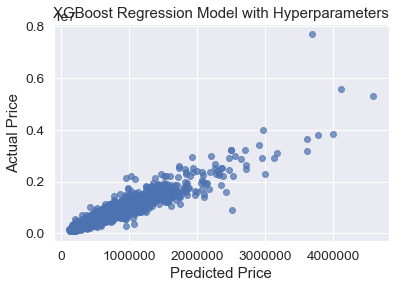

In [123]:
predictions =np.expm1(y_pred_xgb_best)
actual_values =np.expm1(y_test)
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('XGBoost Regression Model with Hyperparameters')
plt.show()

## Model Persistence with Pickle

In [124]:
import pickle

In [125]:
filename = 'price_predictor_model.sav'

In [126]:
# dumping the model in the binary form
pickle.dump(xgb_grid, open(filename, 'wb'))